# Cyclical Systems: An Example of the Crank-Nicolson Method
## CH EN 2450 - Numerical Methods
**Prof. Tony Saad (<a>www.tsaad.net</a>) <br/>Department of Chemical Engineering <br/>University of Utah**
<hr/>

In [24]:
import numpy as np
from numpy import *
# %matplotlib notebook
# %matplotlib nbagg
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# %matplotlib qt
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import odeint

In [25]:
def forward_euler(rhs, f0, tend, dt):
    ''' Computes the forward_euler method '''
    nsteps = int(tend/dt)
    f = np.zeros(nsteps)
    f[0] = f0
    time = np.linspace(0,tend,nsteps)
    for n in np.arange(nsteps-1):
        f[n+1] = f[n] + dt * rhs(f[n], time[n])
    return time, f

def forward_euler_system(rhsvec, f0vec, tend, dt):
    '''
    Solves a system of ODEs using the Forward Euler method
    '''
    nsteps = int(tend/dt)
    neqs = len(f0vec)
    f = np.zeros( (neqs, nsteps) )
    f[:,0] = f0vec
    time = np.linspace(0,tend,nsteps)
    for n in np.arange(nsteps-1):
        t = time[n]
        f[:,n+1] = f[:,n] + dt * rhsvec(f[:,n], t)
    return time, f

def be_residual(fnp1, rhs, fn, dt, tnp1):
    '''
    Nonlinear residual function for the backward Euler implicit time integrator
    '''    
    return fnp1 - fn - dt * rhs(fnp1, tnp1)

def backward_euler(rhs, f0, tend, dt):
    ''' 
    Computes the backward euler method 
    :param rhs: an rhs function
    '''
    nsteps = int(tend/dt)
    f = np.zeros(nsteps)
    f[0] = f0
    time = np.linspace(0,tend,nsteps)
    for n in np.arange(nsteps-1):
        fn = f[n]
        tnp1 = time[n+1]
        fnew = fsolve(be_residual, fn, (rhs, fn, dt, tnp1))
        f[n+1] = fnew
    return time, f

def cn_residual(fnp1, rhs, fn, dt, tnp1, tn):
    '''
    Nonlinear residual function for the Crank-Nicolson implicit time integrator
    '''
    return fnp1 - fn - 0.5 * dt * ( rhs(fnp1, tnp1) + rhs(fn, tn) )

def crank_nicolson(rhs,f0,tend,dt):
    nsteps = int(tend/dt)
    f = np.zeros(nsteps)
    f[0] = f0
    time = np.linspace(0,tend,nsteps)
    for n in np.arange(nsteps-1):
        fn = f[n]
        tnp1 = time[n+1]
        tn = time[n]
        fnew = fsolve(cn_residual, fn, (rhs, fn, dt, tnp1, tn))
        f[n+1] = fnew
    return time, f

# Sharp Transient
Solve the ODE:
\begin{equation}
\frac{\text{d}y}{\text{d}t} = -1000 y + 3000 - 2000 e^{-t};\quad y(0) = 0
\end{equation}
The analytical solution is 
\begin{equation}
y(t) = 3 - 0.998 e^{-1000t} - 2.002 e^{-t}
\end{equation}



We first plot the analytical solution

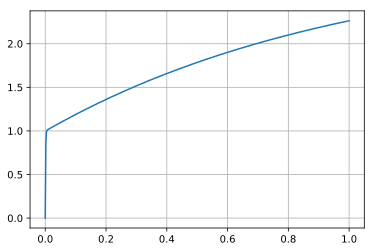

In [26]:
y = lambda t : 3 - 0.998*exp(-1000*t) - 2.002*exp(-t)
t = np.linspace(0,1,500)
plt.plot(t,y(t))
plt.grid()

Now let's solve this numerically. We first define the RHS for this function

In [27]:
def rhs_sharp_transient(f,t):
    return  3000 - 1000 * f - 2000* np.exp(-t)

Let's solve this using forward euler and backward euler

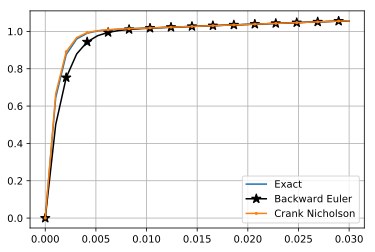

In [28]:
y0 = 0
tend = 0.03
dt = 0.001
t,yfe = forward_euler(rhs_sharp_transient,y0,tend,dt)
t,ybe = backward_euler(rhs_sharp_transient,y0,tend,dt)
t,ycn = crank_nicolson(rhs_sharp_transient,y0,tend,dt)

plt.plot(t,y(t),label='Exact')
# plt.plot(t,yfe,'r.-',markevery=1,markersize=10,label='Forward Euler')
plt.plot(t,ybe,'k*-',markevery=2,markersize=10,label='Backward Euler')
plt.plot(t,ycn,'o-',markevery=2,markersize=2,label='Crank Nicholson')
plt.grid()
plt.legend()

# Oscillatory Systems
Solve the ODE:
Solve the ODE:
\begin{equation}
\frac{\text{d}y}{\text{d}t} = r \omega \sin(\omega t)
\end{equation}
The analytical solution is 
\begin{equation}
y(t) = r - r \cos(\omega t)
\end{equation}




First plot the analytical solution

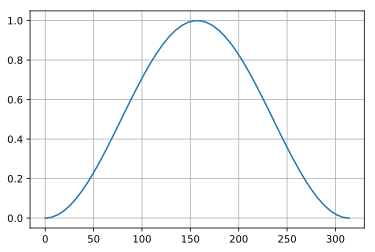

In [29]:
r = 0.5
ω = 0.02
y = lambda t : r - r * cos(ω*t)
t = np.linspace(0,100*pi)
plt.clf()
plt.plot(t,y(t))
plt.grid()

Let's solve this numerically

In [30]:
def rhs_oscillatory(f,t):
    r = 0.5
    ω = 0.02
    return r * ω * sin(ω*t)

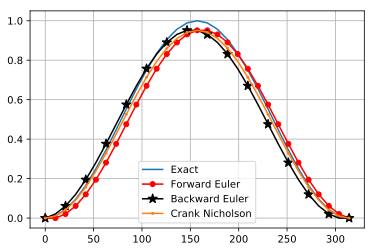

In [31]:
y0 = 0
tend = 100*pi
dt = 10
t,yfe = forward_euler(rhs_oscillatory,y0,tend,dt)
t,ybe = backward_euler(rhs_oscillatory,y0,tend,dt)
t,ycn = crank_nicolson(rhs_oscillatory,y0,tend,dt)
plt.plot(t,y(t),label='Exact')
plt.plot(t,yfe,'r.-',markevery=1,markersize=10,label='Forward Euler')
plt.plot(t,ybe,'k*-',markevery=2,markersize=10,label='Backward Euler')
plt.plot(t,ycn,'o-',markevery=2,markersize=2,label='Crank Nicholson')
plt.grid()
plt.legend()
plt.savefig('cyclical-system-example.pdf')

In [32]:
import urllib
import requests
from IPython.core.display import HTML
def css_styling():
    styles = requests.get("https://raw.githubusercontent.com/saadtony/NumericalMethods/master/styles/custom.css")
    return HTML(styles.text)
css_styling()
